

---



---



---


# **Weather Classification Analysis Model**


---



---



---





---



---


## **Setting Environment**


---



---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/PERSONAL/Projects/ML/Weather Analysis & Predictor Model/weather_data.csv')

In [27]:
data.head(10)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
5,San Diego,2024-01-21 08:54:56,27.341055,49.023236,9.166543,27.473896
6,San Jose,2024-01-13 02:10:54,1.881883,65.742325,0.221709,1.073112
7,New York,2024-01-25 19:04:34,-6.894766,30.804894,8.027624,16.848337
8,New York,2024-03-29 05:20:30,0.963545,38.819158,3.640129,7.989024
9,San Jose,2024-05-18 09:14:02,-1.607088,82.198701,4.101493,25.647282


In [7]:
data['Location']

(0            San Diego
 1            San Diego
 2            San Diego
 3         Philadelphia
 4          San Antonio
               ...     
 999995          Dallas
 999996     San Antonio
 999997        New York
 999998         Chicago
 999999        New York
 Name: Location, Length: 1000000, dtype: object,
 ['Date_Time'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [9]:
data.isnull().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

In [34]:
data.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [11]:
data.shape

(1000000, 6)

In [16]:
data['Temperature_C']

0         10.683001
1          8.734140
2         11.632436
3         -8.628976
4         39.808213
            ...    
999995    23.416877
999996     6.759080
999997    15.664465
999998    18.999994
999999    10.725351
Name: Temperature_C, Length: 1000000, dtype: float64



---



---

## **Visuals**

---



---



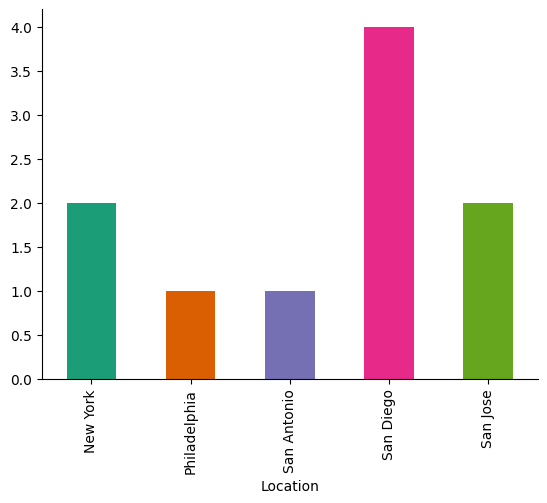

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Location').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

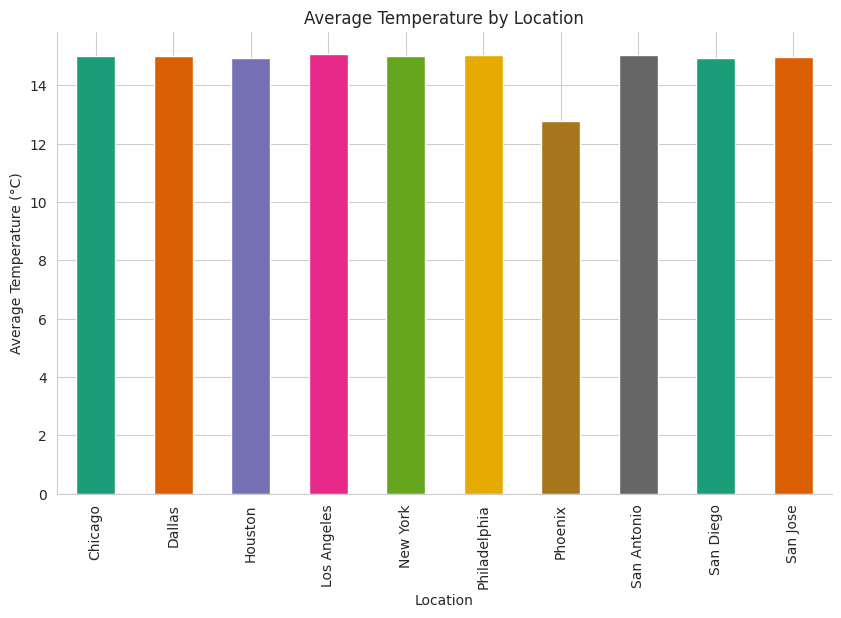

In [40]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Group by 'Location' and calculate the mean temperature
temperature_by_location = data.groupby('Location')['Temperature_C'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
temperature_by_location.plot(kind='bar', color=sns.color_palette('Dark2'))

# Customize the plot
plt.title('Average Temperature by Location')
plt.xlabel('Location')
plt.ylabel('Average Temperature (°C)')
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()



---



---

## **Preprocessing**

---



---



In [48]:
data.head(2)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,8
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,8


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label_encoder = LabelEncoder()

In [44]:
data['Location_encoded'] = label_encoder.fit_transform(data['Location'])

In [47]:
data.head(5)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,8
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,8
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,8
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,5
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,7


In [49]:
data.shape

(1000000, 7)




---


---


## **Feature Engineering**



---


---
Feature engineering is a crucial step in preparing your data for machine learning models. For weather data, you can create additional features or transform existing features to capture important patterns and trends. Here are some examples of feature engineering techniques that can be applied:


---





In [57]:
# Convert 'Date_Time ' to datetime
#data['Date_Time'] = pd.to_datetime(data['Date_Time'])

In [56]:
#data.set_index('Date_Time', inplace= True)

In [52]:
data.head(2)

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded
Date_Time,,,,,,
2024-01-14 21:12:46,San Diego,10.683001,41.195754,4.020119,8.233540,8
2024-05-17 15:22:10,San Diego,8.734140,58.319107,9.111623,27.715161,8




---


###  **1. Lag Features**


---



In [62]:
# Generate Lag feature
#We're making new columns that look back at the temperatures from the past to help predict future temperatures.
data['Temp_Lag1']= data['Temperature_C'].shift(1)
data['Temp_Lag2']= data['Temperature_C'].shift(2)
data['Temp_Lag3']= data['Temperature_C'].shift(3)


In [63]:
data.head(5)

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3
Date_Time,,,,,,,,,
2024-01-14 21:12:46,San Diego,10.683001,41.195754,4.020119,8.233540,8,NaN,NaN,NaN
2024-05-17 15:22:10,San Diego,8.734140,58.319107,9.111623,27.715161,8,10.683001,NaN,NaN
2024-05-11 09:30:59,San Diego,11.632436,38.820175,4.607511,28.732951,8,8.734140,10.683001,NaN
2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303,5,11.632436,8.734140,10.683001
2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622,7,-8.628976,11.632436,8.734140




---

### **2. Rolling Statistics**

---



In [66]:
# Calculate rolling statistics
data['Temp_RollingMean3']= data['Temperature_C'].rolling(window=3).mean()
data['Temp_RollingStd3'] = data['Temperature_C'].rolling(window=3).std()


In [67]:
data.head(5)

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3
Date_Time,,,,,,,,,,,
2024-01-14 21:12:46,San Diego,10.683001,41.195754,4.020119,8.233540,8,NaN,NaN,NaN,NaN,NaN
2024-05-17 15:22:10,San Diego,8.734140,58.319107,9.111623,27.715161,8,10.683001,NaN,NaN,NaN,NaN
2024-05-11 09:30:59,San Diego,11.632436,38.820175,4.607511,28.732951,8,8.734140,10.683001,NaN,10.349859,1.477589
2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303,5,11.632436,8.734140,10.683001,3.912533,10.957514
2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622,7,-8.628976,11.632436,8.734140,14.270558,24.326119




---

### **3. Extracting Date and Time Features**


---



In [69]:
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Hour'] = data.index.hour
data['DayOfWeek'] = data.index.dayofweek



In [70]:
data.head(5)

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3,Month,Day,Hour,DayOfWeek
Date_Time,,,,,,,,,,,,,,,
2024-01-14 21:12:46,San Diego,10.683001,41.195754,4.020119,8.233540,8,NaN,NaN,NaN,NaN,NaN,1,14,21,6
2024-05-17 15:22:10,San Diego,8.734140,58.319107,9.111623,27.715161,8,10.683001,NaN,NaN,NaN,NaN,5,17,15,4
2024-05-11 09:30:59,San Diego,11.632436,38.820175,4.607511,28.732951,8,8.734140,10.683001,NaN,10.349859,1.477589,5,11,9,5
2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303,5,11.632436,8.734140,10.683001,3.912533,10.957514,2,26,17,0
2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622,7,-8.628976,11.632436,8.734140,14.270558,24.326119,4,29,13,0


In [71]:
data.shape

(1000000, 15)

In [80]:
# Drop rows with NaN values (created by lag/rolling features)
data.dropna(inplace=True)
# Reset index if needed
data.reset_index(inplace=True)


In [79]:
data.head(3)

,Date_Time,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3,Month,Day,Hour,DayOfWeek
0,2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303,5,11.632436,8.734140,10.683001,3.912533,10.957514,2,26,17,0
1,2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622,7,-8.628976,11.632436,8.734140,14.270558,24.326119,4,29,13,0
2,2024-01-21 08:54:56,San Diego,27.341055,49.023236,9.166543,27.473896,8,39.808213,-8.628976,11.632436,19.506764,25.150992,1,21,8,6


In [82]:
data.drop(columns=['DayOfWeek'], inplace=True)


In [83]:
data.head(2)

,index,Date_Time,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3,Month,Day,Hour
0,0,2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303,5,11.632436,8.734140,10.683001,3.912533,10.957514,2,26,17
1,1,2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622,7,-8.628976,11.632436,8.734140,14.270558,24.326119,4,29,13




---



---


## **Model Selection: (Weather Classification)**


---



---



####**Setting for Model**

In [85]:
# Rule-based classification
def classify_weather(row):
    if row['Precipitation_mm'] > 5:
        return 'Rainy'
    elif row['Wind_Speed_kmh'] > 20:
        return 'Windy'
    elif row['Humidity_pct'] > 60:
        return 'Cloudy'
    else:
        return 'Sunny'

In [87]:
# Apply the classification
data['Weather'] = data.apply(classify_weather, axis=1)


In [88]:
data.head(5)

,index,Date_Time,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3,Month,Day,Hour,Weather
0,0,2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303,5,11.632436,8.734140,10.683001,3.912533,10.957514,2,26,17,Windy
1,1,2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622,7,-8.628976,11.632436,8.734140,14.270558,24.326119,4,29,13,Rainy
2,2,2024-01-21 08:54:56,San Diego,27.341055,49.023236,9.166543,27.473896,8,39.808213,-8.628976,11.632436,19.506764,25.150992,1,21,8,Rainy
3,3,2024-01-13 02:10:54,San Jose,1.881883,65.742325,0.221709,1.073112,9,27.341055,39.808213,-8.628976,23.010384,19.330485,1,13,2,Cloudy
4,4,2024-01-25 19:04:34,New York,-6.894766,30.804894,8.027624,16.848337,4,1.881883,27.341055,39.808213,7.442724,17.782437,1,25,19,Rainy


In [93]:
# Print the DataFrame with the new target variable
print(data[['Date_Time', 'Location', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Weather']].head(3))


            Date_Time      Location  Temperature_C  Humidity_pct  \
0 2024-02-26 17:32:39  Philadelphia      -8.628976     54.074474   
1 2024-04-29 13:23:51   San Antonio      39.808213     72.899908   
2 2024-01-21 08:54:56     San Diego      27.341055     49.023236   

   Precipitation_mm  Wind_Speed_kmh Weather  
0          3.183720       26.367303   Windy  
1          9.598282       29.898622   Rainy  
2          9.166543       27.473896   Rainy  


In [94]:
selected_features = [
    'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh',
    'Temp_Lag1', 'Temp_Lag2', 'Temp_RollingMean3', 'Temp_RollingStd3',
    'Month', 'Day', 'Hour'
]

In [96]:
X = data[selected_features]
y = data['Weather']

All Done now its time for model applying




---


---

### **Random Forest**


1.0 Accuracy...

---



---





---


#### **Setting up Env**


---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



---


#### **Train_test_split**


---



In [97]:
# Split the data into train and test sets
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)


In [101]:
print(X_train.shape)
print(y_train.shape)

(799997, 11)
(799997,)


In [102]:
print(X_test.shape)
print(y_test.shape)

(200000, 11)
(200000,)




---


#### **Initialize and train Model**


---



In [104]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier

RandomForestClassifier(random_state=42)



---

#### **Fitting Model**

---



In [105]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)



---

#### **Predict using (X_test)**

---



In [107]:
# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)
rf_predictions

array(['Rainy', 'Rainy', 'Sunny', ..., 'Rainy', 'Rainy', 'Rainy'],
      dtype=object)



---

####  **Evaluation**

---



In [108]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy : ", rf_accuracy)

Random Forest Accuracy :  1.0


In [111]:
# Load the saved model
#loaded_rf_model = joblib.load('random_forest_model.pkl')



---


Accuracy got through Random Forest is so perfect 1.0


---





---


#### **Save Model**


---



In [110]:
import joblib

joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']



---


---



---




---



---





---


---



### **Support Vector Machine (SVM):**

0.99935 Accuracy...

---


---







---


#### **Setting up Env**


---



In [112]:
from sklearn.svm import SVC



---


#### **Initialize and train SVM classifier**


---



In [114]:
# Initialize and train SVM classifier

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)



---

#### **Predict on the test set**


---



In [115]:
svm_predictions= svm_classifier.predict(X_test)

In [116]:
svm_predictions

array(['Rainy', 'Rainy', 'Sunny', ..., 'Rainy', 'Rainy', 'Rainy'],
      dtype=object)



---


#### **Evaluate accuracy**


---



In [117]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.999035




---

The SVM algorithm accuracy is 0.999035 which is quite good but not like Random Forest

---





---


#### **Saving & Loading Model**

---



In [118]:
 import joblib

# Assuming svm_classifier is your trained SVM model
joblib.dump(svm_classifier, 'svm_model.pkl')

['svm_model.pkl']

In [119]:
# Load the saved SVM model
#loaded_svm_model = joblib.load('svm_model.pkl')




---



---


## **Predicting dataset**


---



---





---

#### **Loading Dataset for Predictions**

---



In [141]:
data_to_predict = pd.read_csv("/content/weather_data_predict_the_weather.csv")
data_to_predict

,index,Date_Time,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3,Month,Day,Hour
0,0,2024-12-01 21:00:00,San Jose,24.33,43.98,2.82,25.04,2,21.52,5.38,38.42,-6.04,26.79,3,7,0
1,1,2024-07-26 06:00:00,San Antonio,-5.66,58.53,6.49,2.28,10,3.57,22.58,7.80,6.26,27.00,8,13,5
2,2,2024-09-03 21:00:00,Philadelphia,2.43,39.01,7.35,27.52,4,-2.80,8.88,-4.64,21.55,2.50,7,28,11
3,3,2024-12-02 07:00:00,Philadelphia,39.05,74.09,7.07,15.04,6,31.66,17.79,26.59,29.41,10.62,10,24,7
4,4,2024-09-26 15:00:00,Philadelphia,3.79,50.02,3.45,5.00,1,24.71,-3.39,-0.46,28.51,14.99,3,16,8
5,5,2024-03-08 02:00:00,San Diego,11.52,61.59,4.56,17.73,8,-7.43,13.19,33.65,8.95,22.43,7,8,16
6,6,2024-11-23 18:00:00,New York,-5.88,59.27,3.44,29.31,5,3.00,-0.86,14.00,25.20,1.06,3,14,23
7,7,2024-09-09 04:00:00,San Diego,24.96,36.80,4.71,22.21,10,17.76,20.71,-4.48,13.64,0.82,10,24,13
8,8,2024-08-17 19:00:00,San Jose,38.81,43.15,9.01,20.19,9,-0.84,29.90,7.72,32.54,12.97,10,23,2
9,9,2024-06-30 11:00:00,San Jose,4.51,43.92,9.49,0.01,1,-0.71,10.40,10.60,38.20,20.85,7,12,5


In [125]:
data_to_predict.head(2)

,index,Date_Time,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3,Month,Day,Hour
0,0,2024-12-01 21:00:00,San Jose,24.33,43.98,2.82,25.04,2,21.52,5.38,38.42,-6.04,26.79,3,7,0
1,1,2024-07-26 06:00:00,San Antonio,-5.66,58.53,6.49,2.28,10,3.57,22.58,7.80,6.26,27.00,8,13,5




---

#### **Loading Random Forest Model**

---



In [127]:
# Load the saved Random Forest model
loaded_rf_model = joblib.load('random_forest_model.pkl')
loaded_rf_model

RandomForestClassifier(random_state=42)



---

#### **Selecting Features for predictions**

---



In [134]:
# Select features for prediction
features_to_predict = data_to_predict[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh',
    'Temp_Lag1', 'Temp_Lag2', 'Temp_RollingMean3', 'Temp_RollingStd3',
    'Month', 'Day', 'Hour']]




---

#### **Predict the weather using features**

---



In [135]:
# Make predictions using the loaded Random Forest model
predictions = loaded_rf_model.predict(features_to_predict)


In [136]:
predictions

array(['Windy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Windy',
       'Windy', 'Rainy', 'Rainy', 'Windy', 'Windy', 'Rainy', 'Rainy',
       'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Windy', 'Windy', 'Windy',
       'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy',
       'Rainy', 'Sunny', 'Windy', 'Rainy', 'Cloudy', 'Rainy', 'Windy',
       'Rainy', 'Sunny', 'Rainy', 'Windy', 'Sunny', 'Rainy', 'Windy',
       'Sunny', 'Rainy', 'Windy', 'Windy', 'Rainy', 'Cloudy', 'Windy',
       'Sunny'], dtype=object)



---

#### **Add predictions to the dataframe**

---



In [137]:
# Add predictions to the DataFrame
data_to_predict['Predicted_Weather'] = predictions


In [138]:
data_to_predict.head(2)

,index,Date_Time,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Location_encoded,Temp_Lag1,Temp_Lag2,Temp_Lag3,Temp_RollingMean3,Temp_RollingStd3,Month,Day,Hour,Predicted_Weather
0,0,2024-12-01 21:00:00,San Jose,24.33,43.98,2.82,25.04,2,21.52,5.38,38.42,-6.04,26.79,3,7,0,Windy
1,1,2024-07-26 06:00:00,San Antonio,-5.66,58.53,6.49,2.28,10,3.57,22.58,7.80,6.26,27.00,8,13,5,Rainy




---

#### **Saving Predictions to predictions_dataset**

---



In [139]:
# Save DataFrame with predictions to CSV file
data_to_predict.to_csv('weather_data_with_predictions.csv', index=False)